In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette="muted")
%matplotlib inline

import sklearn
from sklearn import datasets
import sklearn.model_selection

In [2]:
iris_data = sklearn.datasets.load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = iris_data.data
y = iris_data.target

iris = pd.DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris['Species'] = y
iris.Species.astype(int, inplace=True)
iris.sample(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
140,6.7,3.1,5.6,2.4,2
6,4.6,3.4,1.4,0.3,0
13,4.3,3.0,1.1,0.1,0
46,5.1,3.8,1.6,0.2,0
102,7.1,3.0,5.9,2.1,2


In [4]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

iris['Species'] = iris['Species'].apply(flower)
iris.sample(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
50,7.0,3.2,4.7,1.4,Versicolour
122,7.7,2.8,6.7,2.0,Virginica
20,5.4,3.4,1.7,0.2,Setosa
133,6.3,2.8,5.1,1.5,Virginica
135,7.7,3.0,6.1,2.3,Virginica


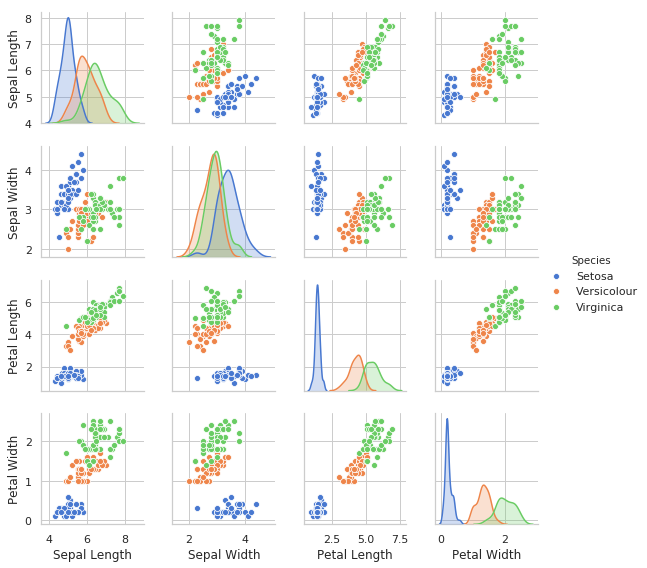

In [6]:
sns.pairplot(iris,hue='Species',size=2)

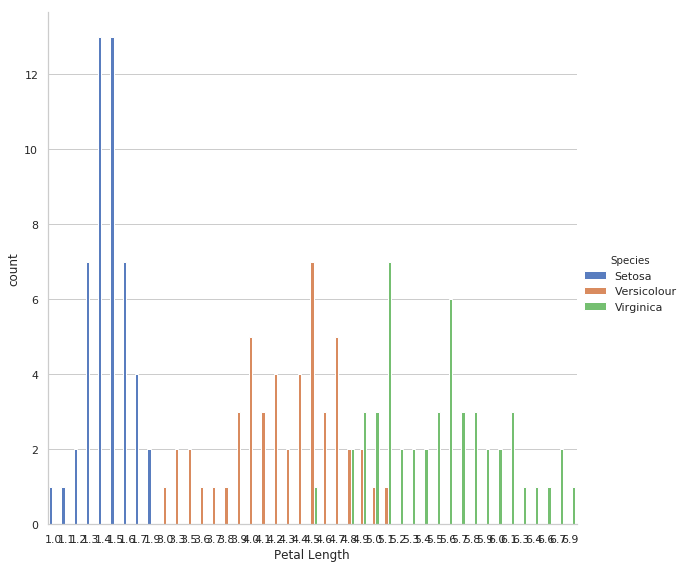

In [8]:
sns.factorplot('Petal Length',data=iris,hue='Species', kind='count', size=8)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='macro')

print("Precisão: ", precision)

Precisão:  0.9833333333333334


In [16]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='macro')
print("Recall: ", recall)

Recall:  0.9814814814814815


In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.9833333333333333


In [18]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão: ", matrix)

Matriz de Confusão:  [[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
